In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from collections import defaultdict


# Image Path

In [3]:
Splits = ["train", "val", "test"]
subset_dir   = "/content/drive/MyDrive/SmartVisionAI/smartvision_dataset/classification_subset"

In [4]:
train_dir = os.path.join(subset_dir, "train")
val_dir = os.path.join(subset_dir, "val")
test_dir = os.path.join(subset_dir, "test")

# Class Count

In [5]:
for splits in Splits:
    split_path=os.path.join(subset_dir, splits)
    classes=sorted(os.listdir(split_path))
    # print(f"Number of classes in {splits} set: {len(classes)}")
    print(f'{splits.upper()} -> {len(classes)} classes')

TRAIN -> 26 classes
VAL -> 26 classes
TEST -> 26 classes


# Image Count

In [6]:
data=[]
for split in Splits:
    split_path=os.path.join(subset_dir, split)
    classes=sorted(os.listdir(split_path))
    for cls in classes:
        cls_path=os.path.join(split_path, cls)
        images=os.listdir(cls_path)
        for img in images:
            img_path=os.path.join(cls_path, img)
            # count=len(img for img in images)
            data.append({'Split':split, 'Class':cls, 'Image_path':img_path})

In [7]:
df_counts=pd.DataFrame(data, columns=['Split', 'Class', 'Image_path'])
df_counts.head()

,Split,Class,Image_path
0,train,airplane,/content/drive/MyDrive/SmartVisionAI/smartvisi...
1,train,airplane,/content/drive/MyDrive/SmartVisionAI/smartvisi...
2,train,airplane,/content/drive/MyDrive/SmartVisionAI/smartvisi...
3,train,airplane,/content/drive/MyDrive/SmartVisionAI/smartvisi...
4,train,airplane,/content/drive/MyDrive/SmartVisionAI/smartvisi...


In [8]:
df_counts['Split'].value_counts()

,count
Split,
train,3900
val,650
test,650


In [9]:
df_counts['Class'].value_counts()

,count
Class,
airplane,200
bed,200
bench,200
bicycle,200
bird,200
bottle,200
bowl,200
bus,200
cake,200


# Number Of Images per Class

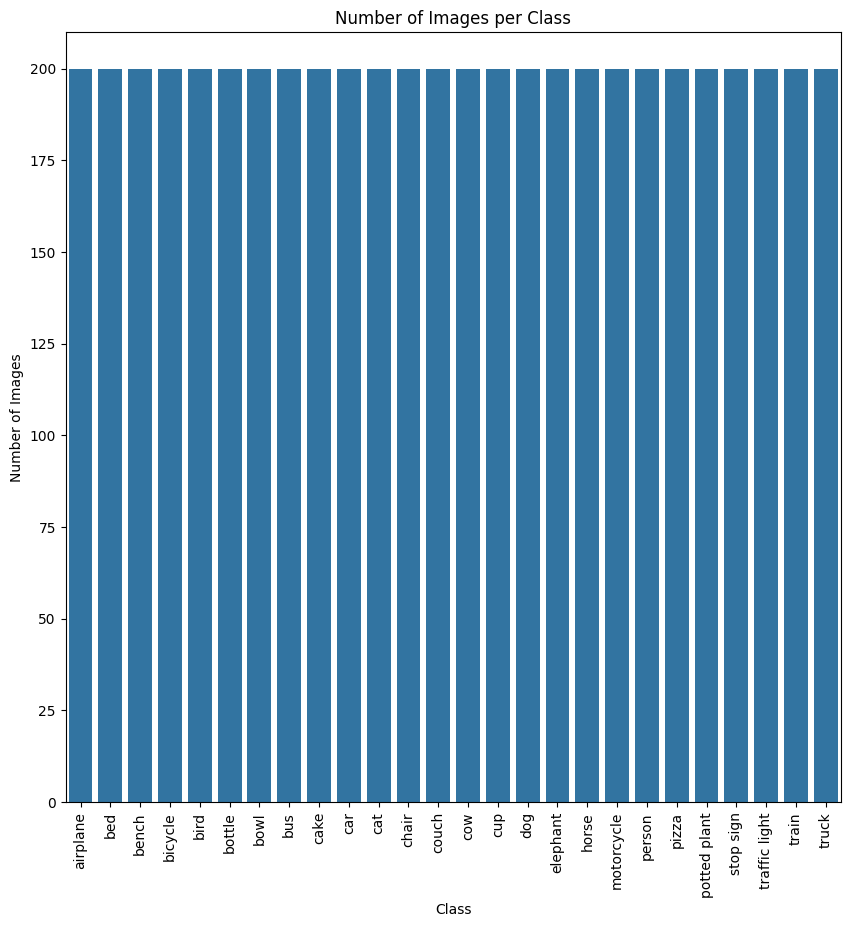

In [10]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.countplot(data=df_counts, x='Class')
plt.title('Number of Images per Class')
plt.xlabel('Class')
plt.xticks(df_counts['Class'].unique(), rotation=90)
plt.ylabel('Number of Images')
plt.show()

In [11]:
pivot_df=df_counts.pivot_table(
    index='Class',
    columns='Split',
    values='Image_path',
    aggfunc='count',
    fill_value=0
)
pivot_df['Total']=pivot_df.sum(axis=1)
pivot_df=pivot_df.sort_values('Total', ascending=False)
pivot_df


Split,test,train,val,Total
Class,,,,
airplane,25,150,25,200
bed,25,150,25,200
bench,25,150,25,200
bicycle,25,150,25,200
bird,25,150,25,200
bottle,25,150,25,200
bowl,25,150,25,200
bus,25,150,25,200
cake,25,150,25,200


# Class Distribution Plot for All Splits

<Figure size 1400x800 with 0 Axes>

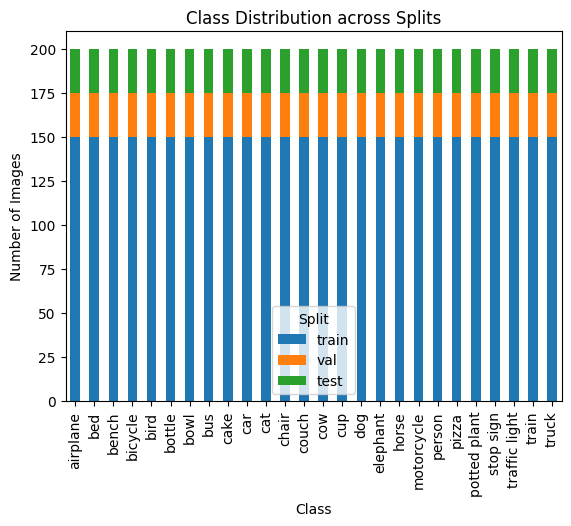

In [12]:
plt.figure(figsize=(14,8))
pivot_df[['train', 'val', 'test']].plot(kind='bar', stacked=True)
plt.title('Class Distribution across Splits')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

# Class Distribution Pltot for Train

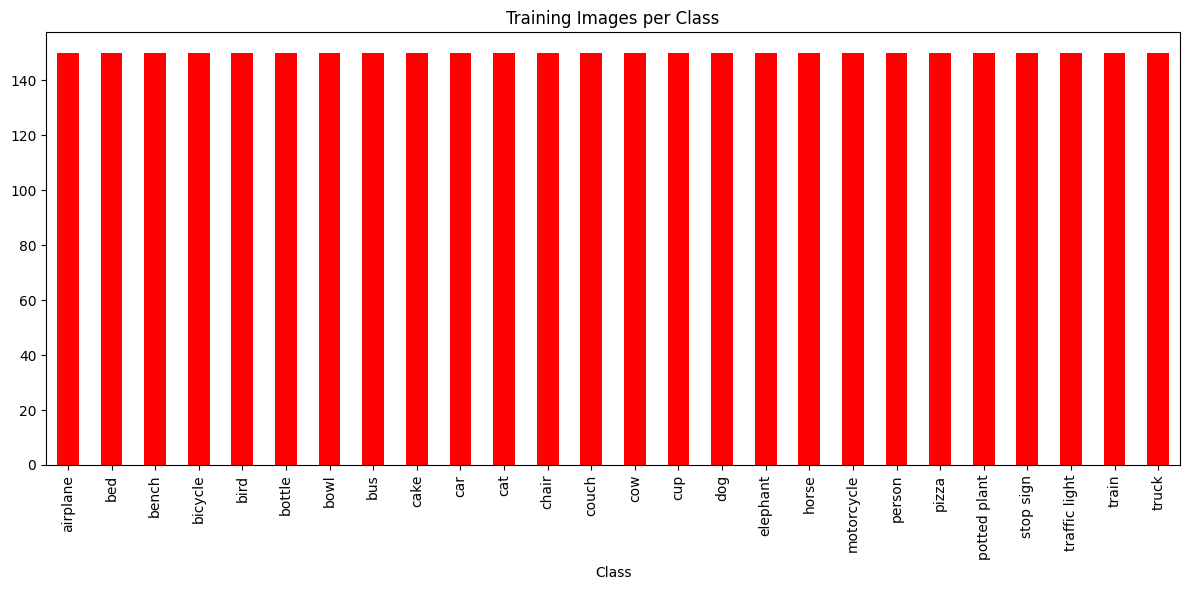

In [13]:
plt.figure(figsize=(12,6))
pivot_df['train'].plot(kind='bar',color='red')
plt.title('Training Images per Class')
plt.xlabel("Class")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Validation Images per Class

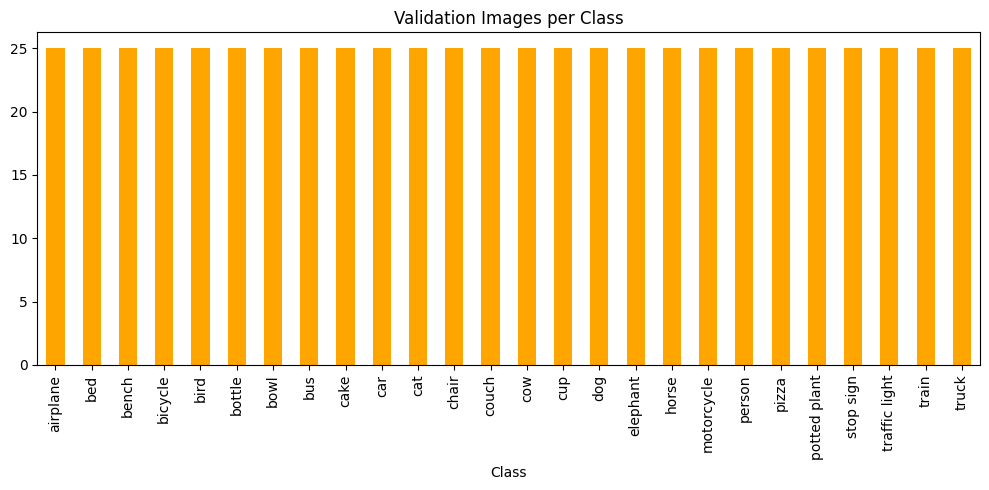

In [14]:
plt.figure(figsize=(10,5))
pivot_df['val'].plot(kind='bar', color='orange')
plt.title('Validation Images per Class')
plt.xlabel("Class")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Test Images Per Class

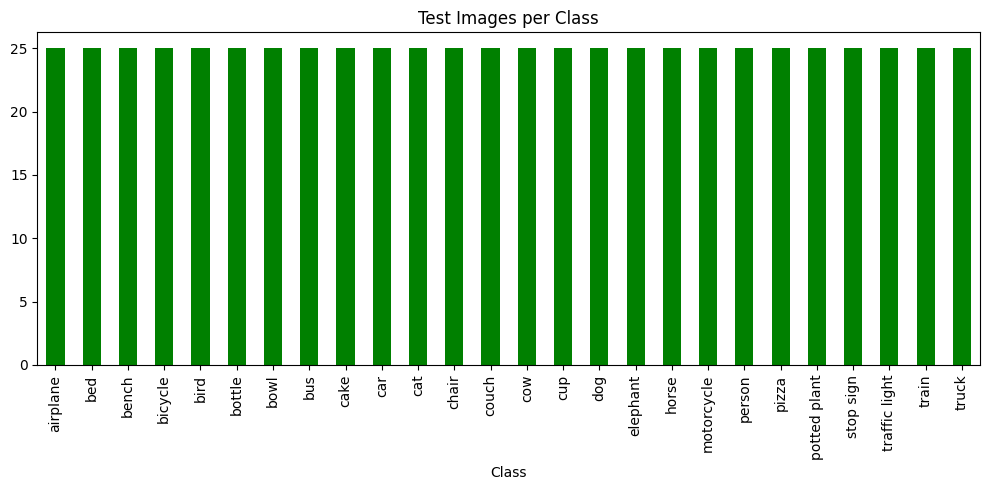

In [15]:
plt.figure(figsize=(10,5))
pivot_df['test'].plot(kind='bar', color='green')
plt.title('Test Images per Class')
plt.xlabel("Class")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Show Samples of different Images

In [16]:
def show_random_images(split="train", samples_per_class=3):
    split_path = os.path.join(subset_dir, split)

    for cls in random.sample(os.listdir(split_path), 25):
        cls_path = os.path.join(split_path, cls)
        images = os.listdir(cls_path)

        plt.figure(figsize=(12, 3))
        for i, img_name in enumerate(random.sample(images, min(samples_per_class, len(images)))):
            img_path = os.path.join(cls_path, img_name)
            img = Image.open(img_path)

            plt.subplot(1, samples_per_class, i + 1)
            plt.imshow(img)
            plt.axis("off")
            plt.title(cls)

        plt.show()


In [17]:
show_random_images("train")

Output hidden; open in https://colab.research.google.com to view.

# Checking the Images Size

In [18]:
# image_size=[]

# for split in Splits:
#     split_path=os.path.join(subset_dir, split)
#     classes=os.listdir(split_path)
#     for cls in os.listdir(split_path):
#         cls_path=os.path.join(split_path, cls)

#         for img_name in os.listdir(cls_path):
#             if img_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
#                 img_path=os.path.join(cls_path, img_name)
#                 img=Image.open(img_path)
#                 w,h=img.size
#                 image_size.append({'Split':split, 'Class':cls, 'Image_name':img_name, 'Width':w, 'Height':h})



In [19]:
# size_df=pd.DataFrame(image_size, columns=['Split', 'Class', 'Image_name', 'Width', 'Height'])
# size_df.head()

In [20]:
# size_df.describe()

# Image Size Distribution

In [21]:
# plt.figure(figsize=(10,5))

# plt.subplot(1,2,1)

# plt.hist(size_df['Width'], bins=30, color='blue', alpha=0.7)
# plt.title('Distribution of Image Widths')
# plt.xlabel('Width (pixels)')
# plt.ylabel('Frequency')

# plt.subplot(1,2,2)
# plt.hist(size_df['Height'], bins=30, color='green', alpha=0.7)
# plt.title('Distribution of Image Heights')
# plt.xlabel('Height (pixels)')
# plt.ylabel('Frequency')

# plt.tight_layout()
# plt.show()

In [22]:
percentage_df = pivot_df.copy()

for split in Splits:
    percentage_df[split] = (percentage_df[split] / percentage_df["Total"]) * 100

percentage_df[Splits].round(2)


Split,train,val,test
Class,,,
airplane,75.0,12.5,12.5
bed,75.0,12.5,12.5
bench,75.0,12.5,12.5
bicycle,75.0,12.5,12.5
bird,75.0,12.5,12.5
bottle,75.0,12.5,12.5
bowl,75.0,12.5,12.5
bus,75.0,12.5,12.5
cake,75.0,12.5,12.5


In [23]:
print(f"Total Images: {pivot_df['Total'].sum()}")
print(f"Total Classes: {pivot_df.shape[0]}")
print("Top 5 Classes by Image Count:")
print(pivot_df.head())

Total Images: 5200
Total Classes: 26
Top 5 Classes by Image Count:
Split     test  train  val  Total
Class                            
airplane    25    150   25    200
bed         25    150   25    200
bench       25    150   25    200
bicycle     25    150   25    200
bird        25    150   25    200


In [24]:
show_random_images('val')

Output hidden; open in https://colab.research.google.com to view.

In [25]:
show_random_images('test')

Output hidden; open in https://colab.research.google.com to view.

# Verify Images sizes

In [26]:
for cls in os.listdir(train_dir):
    cls_path = os.path.join(train_dir, cls)
    img_name = os.listdir(cls_path)[0]
    img = Image.open(os.path.join(cls_path, img_name))
    print(f"{cls}: {img.size}")


bicycle: (224, 224)
person: (224, 224)
motorcycle: (224, 224)
car: (224, 224)
airplane: (224, 224)
bus: (224, 224)
truck: (224, 224)
train: (224, 224)
traffic light: (224, 224)
stop sign: (224, 224)
bench: (224, 224)
cat: (224, 224)
bird: (224, 224)
dog: (224, 224)
horse: (224, 224)
cow: (224, 224)
elephant: (224, 224)
bottle: (224, 224)
cup: (224, 224)
pizza: (224, 224)
bowl: (224, 224)
cake: (224, 224)
couch: (224, 224)
chair: (224, 224)
bed: (224, 224)
potted plant: (224, 224)


# Data Normalization

In [27]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

BATCH_SIZE = 32

imagenet_mean = [0.485, 0.456, 0.406]
imagenet_std  = [0.229, 0.224, 0.225]

train_transform = transforms.Compose([
    transforms.ToTensor(),                         # [0,255] → [0,1]
    transforms.Normalize(imagenet_mean, imagenet_std)
])

val_test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(imagenet_mean, imagenet_std)
])

# Datasets
train_dataset = datasets.ImageFolder(
    root=f"{train_dir}",
    transform=train_transform
)

val_dataset = datasets.ImageFolder(
    root=f"{val_dir}",
    transform=val_test_transform
)

test_dataset = datasets.ImageFolder(
    root=f"{val_dir}",
    transform=val_test_transform
)

# Dataloaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

print("Classes:", train_dataset.classes)
print("Number of classes:", len(train_dataset.classes))


Classes: ['airplane', 'bed', 'bench', 'bicycle', 'bird', 'bottle', 'bowl', 'bus', 'cake', 'car', 'cat', 'chair', 'couch', 'cow', 'cup', 'dog', 'elephant', 'horse', 'motorcycle', 'person', 'pizza', 'potted plant', 'stop sign', 'traffic light', 'train', 'truck']
Number of classes: 26


# Data Augmentation

In [28]:
# train_transform = transforms.Compose([
#     transforms.RandomHorizontalFlip(p=0.5),
#     transforms.RandomRotation(15),
#     transforms.ColorJitter(
#         brightness=0.2,
#         contrast=0.2,
#         saturation=0.2,
#         hue=0.1
#     ),
#     transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
#     transforms.ToTensor(),
#     transforms.Normalize(imagenet_mean, imagenet_std)
# ])

# val_test_transform = transforms.Compose([
#     transforms.Resize(224),
#     transforms.CenterCrop(224),
#     transforms.ToTensor(),
#     transforms.Normalize(imagenet_mean, imagenet_std)
# ])

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(
        brightness=0.2,
        contrast=0.2,
        saturation=0.2
    ),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])
val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

# Show Augmented Images

In [29]:
def show_augmented_images(dataloader, classes, n=25):
    data_iter = iter(dataloader)
    images, labels = next(data_iter)

    n = min(n, len(images))
    images = images[:n]
    labels = labels[:n]

    mean = torch.tensor(imagenet_mean).view(3, 1, 1)
    std = torch.tensor(imagenet_std).view(3, 1, 1)
    images = images * std + mean

    cols = 5
    rows = (n + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))
    axes = axes.flatten()

    for i in range(n):
        img = images[i].permute(1, 2, 0).numpy()
        img = np.clip(img, 0, 1)

        axes[i].imshow(img)
        axes[i].set_title(classes[labels[i]])
        axes[i].axis('off')

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

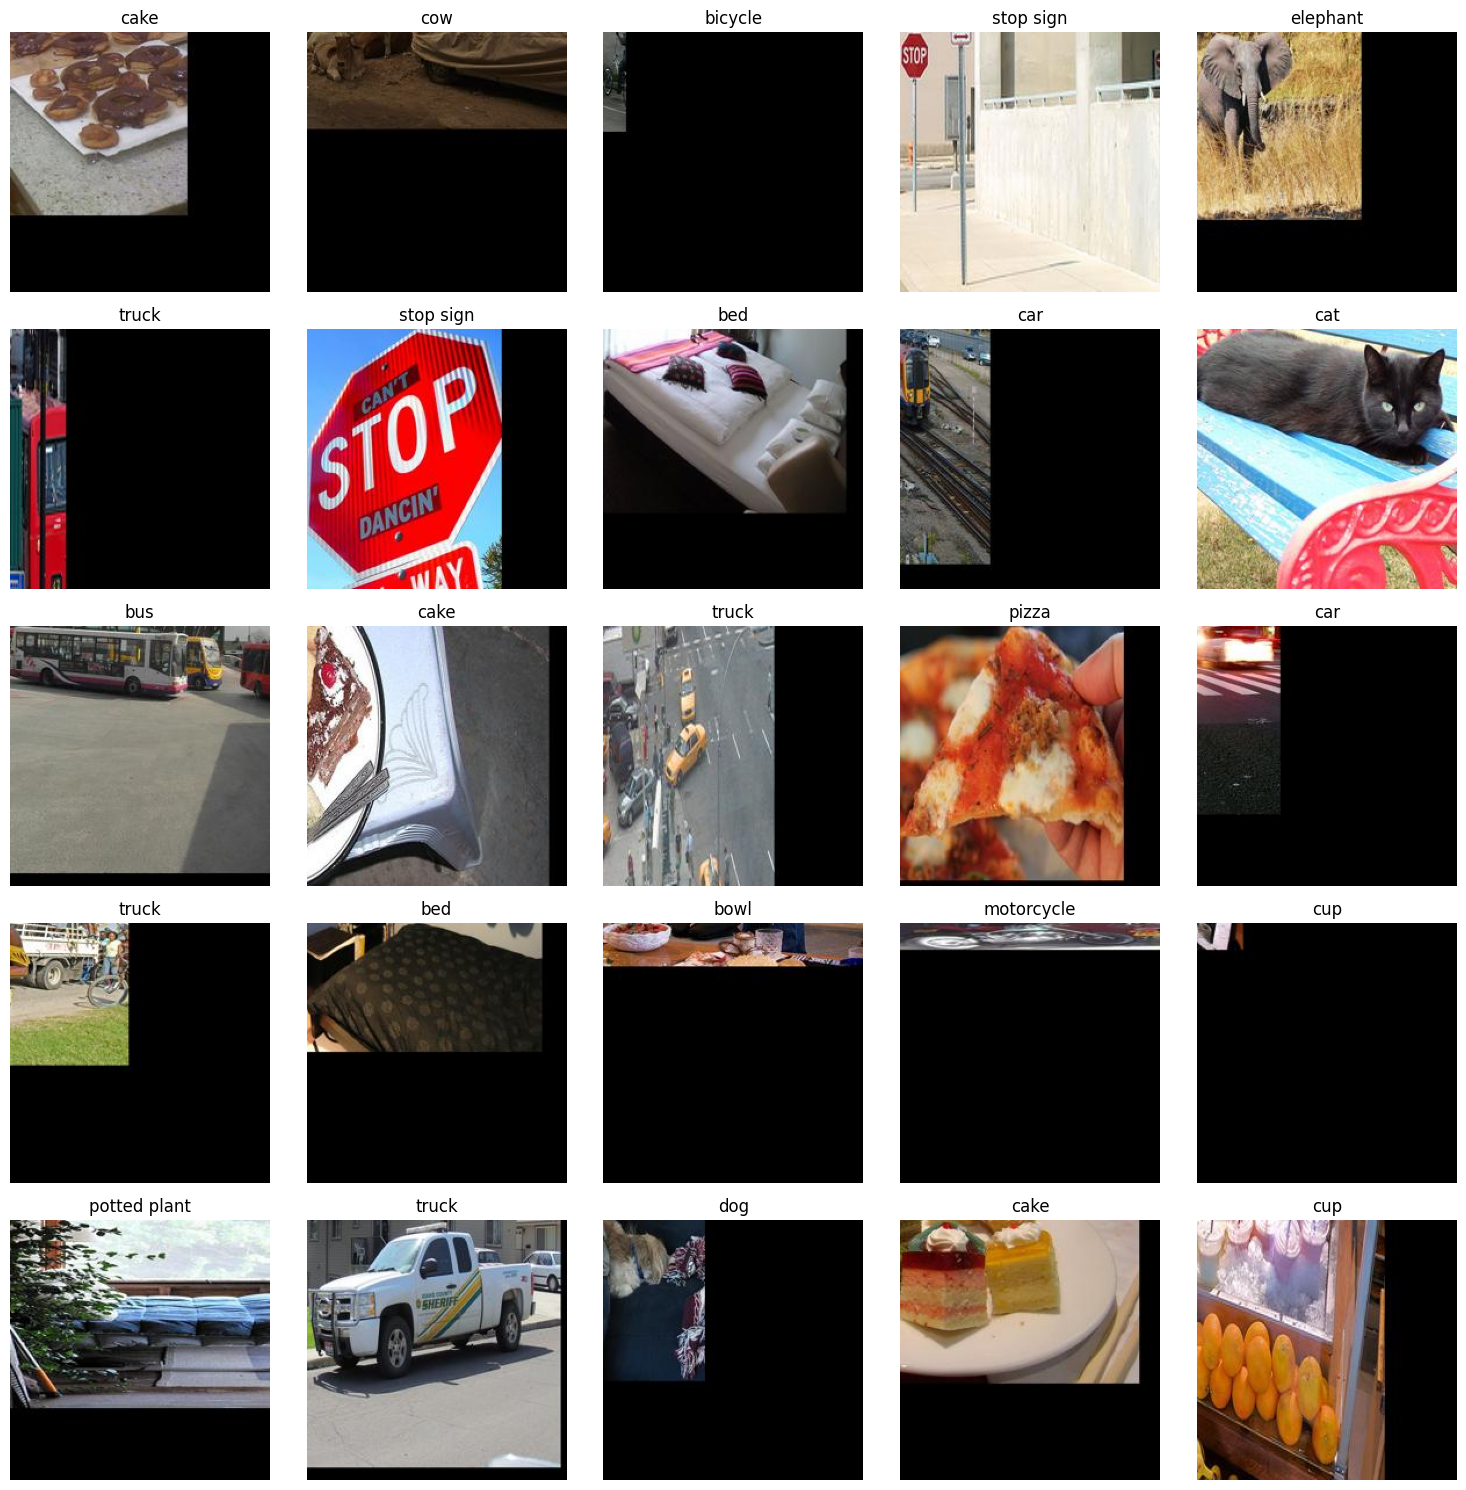

In [30]:
show_augmented_images(train_loader, train_dataset.classes)

In [31]:
images, labels = next(iter(train_loader))

print("Min pixel value:", images.min().item())
print("Max pixel value:", images.max().item())
print("Mean pixel value:", images.mean().item())
print("Std pixel value:", images.std().item())


Min pixel value: -2.1179039478302
Max pixel value: 2.640000104904175
Mean pixel value: -0.5647108554840088
Std pixel value: 1.3936035633087158


# Visualizing Normalized vs Unnormalized Images.

In [32]:
def compare_normalized_image(dataset, idx=0):
    img, label = dataset[idx]

    mean = torch.tensor(imagenet_mean).view(3,1,1)
    std  = torch.tensor(imagenet_std).view(3,1,1)
    img_unnorm = img * std + mean

    fig, ax = plt.subplots(1,2, figsize=(8,4))

    ax[0].imshow(img_unnorm.permute(1,2,0))
    ax[0].set_title("Unnormalized")
    ax[0].axis("off")

    ax[1].imshow(img.permute(1,2,0))
    ax[1].set_title("Normalized ")
    ax[1].axis("off")

    plt.show()


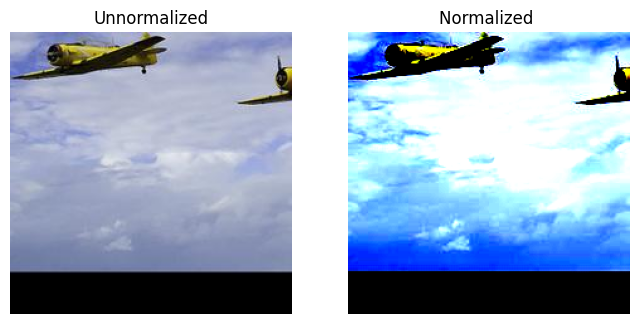

In [33]:
# for i in range(25):
#     compare_normalized_image(train_dataset, idx=i)
compare_normalized_image(train_dataset, idx=20)

# Train Resnet Model

In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torch.optim.lr_scheduler import ReduceLROnPlateau
from collections import Counter
import numpy as np


In [35]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [36]:
model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)

In [37]:
for param in model.parameters():
    param.requires_grad = False

In [38]:
num_classes = 26
model.fc = nn.Sequential(
    nn.Linear(model.fc.in_features, 512),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(512, num_classes)
)

model = model.to(device)

In [39]:
labels = train_dataset.targets
class_counts = Counter(labels)

class_weights = []
for i in range(num_classes):
    class_weights.append(1.0 / class_counts[i])

class_weights = torch.tensor(class_weights).to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights)

In [40]:
optimizer = optim.Adam(model.fc.parameters(), lr=1e-3)
scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.3)

In [41]:
def accuracy(output, target, topk=(1, 3)):
    maxk = max(topk)
    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].reshape(-1).float().sum(0)
        res.append(correct_k / target.size(0))
    return res

In [42]:
def overall_accuracy(outputs, labels):
    """
    outputs: raw logits from model (B, num_classes)
    labels: ground truth labels (B)
    """
    _, preds = torch.max(outputs, dim=1)
    correct = (preds == labels).sum().item()
    return correct


In [43]:
epochs = 15

for epoch in range(epochs):

    model.train()
    train_loss = 0
    train_correct = 0
    train_total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

        train_correct += overall_accuracy(outputs, labels)
        train_total += labels.size(0)

    train_acc = 100 * train_correct / train_total

    model.eval()
    val_loss = 0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()

            val_correct += overall_accuracy(outputs, labels)
            val_total += labels.size(0)

    val_acc = 100 * val_correct / val_total

    scheduler.step(val_loss)

    print(
        f"Epoch [{epoch+1}/{epochs}] | "
        f"Train Loss: {train_loss/len(train_loader):.3f} | "
        f"Train Acc: {train_acc:.2f}% || "
        f"Val Loss: {val_loss/len(val_loader):.3f} | "
        f"Val Acc: {val_acc:.2f}%"
    )


Epoch [1/15] | Train Loss: 2.579 | Train Acc: 26.38% || Val Loss: 1.950 | Val Acc: 48.31%
Epoch [2/15] | Train Loss: 1.845 | Train Acc: 45.36% || Val Loss: 1.629 | Val Acc: 52.77%
Epoch [3/15] | Train Loss: 1.599 | Train Acc: 51.62% || Val Loss: 1.538 | Val Acc: 56.15%
Epoch [4/15] | Train Loss: 1.492 | Train Acc: 55.79% || Val Loss: 1.455 | Val Acc: 58.31%
Epoch [5/15] | Train Loss: 1.403 | Train Acc: 57.46% || Val Loss: 1.420 | Val Acc: 59.23%
Epoch [6/15] | Train Loss: 1.302 | Train Acc: 61.03% || Val Loss: 1.381 | Val Acc: 62.77%
Epoch [7/15] | Train Loss: 1.232 | Train Acc: 62.79% || Val Loss: 1.365 | Val Acc: 62.00%
Epoch [8/15] | Train Loss: 1.196 | Train Acc: 63.87% || Val Loss: 1.291 | Val Acc: 63.69%
Epoch [9/15] | Train Loss: 1.130 | Train Acc: 66.33% || Val Loss: 1.273 | Val Acc: 64.00%
Epoch [10/15] | Train Loss: 1.076 | Train Acc: 67.92% || Val Loss: 1.246 | Val Acc: 66.00%
Epoch [11/15] | Train Loss: 1.053 | Train Acc: 68.23% || Val Loss: 1.218 | Val Acc: 66.62%
Epoch [1

In [44]:
for name, param in model.named_parameters():
    if "layer4" in name:
        param.requires_grad = True

In [45]:
optimizer = optim.Adam(
    filter(lambda p: p.requires_grad, model.parameters()),
    lr=1e-4
)

In [46]:
finetune_epochs = 6
fine_tune_lr = 1e-4

In [47]:
for param in model.parameters():
    param.requires_grad = False

In [49]:
if hasattr(model, "layer4"):
    for param in model.layer4.parameters():
        param.requires_grad = True
elif hasattr(model, "features"):
    for param in model.features[-4:].parameters():  # last few layers
        param.requires_grad = True

# ---- EfficientNet ----
elif hasattr(model, "features"):
    for param in model.features[-3:].parameters():
        param.requires_grad = True

In [50]:
optimizer = torch.optim.Adam(
    filter(lambda p: p.requires_grad, model.parameters()),
    lr=fine_tune_lr
)

In [52]:
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode="min", patience=2, factor=0.3
)

In [53]:
model_save_path = '/content/drive/MyDrive/resnet50_finetuned.pth'
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to /content/drive/MyDrive/resnet50_finetuned.pth
